## 레고 분석 
- 레고의 데이터셋을 분석하면서 판다스에서 데이터를 집계하고 병합하는 방법을 알아본다. 
- 레고 데이터셋은 회사의 역사, 출시 제품, 어떤 레고 세트가 제일 잘 나가는지에 대한 여러 흥미로운 질문에 답하는데 도움이 될 것이다. 
    - 지금까지 만들어진 가장 거대한 레고 세트는 무엇이며 몇 개의 부품으로 구성되어 있을까? 
    - 최초의 레고 세트가 출시된 연도와 처음 출시되었을 때 회사에서 판매한 세트 수는 몇 개일까? 
    - 레고에서 가장 많은 세트를 보유한 테마는 어떤 것일까? 해리포터, 닌자고, 프렌즈 아니면 다른 것일까?
    - 레고 회사는 살제로 언제 출시 제품을 기반으로 도약했을까? 매년 몇 개의 테마와 세트가 출시될까? 
    - 레고 세트는 해가 갈수록 크기와 복잡도가 늘어날까? 예전 레고 세트는 요즘 세트와 비교했을 때 부품이 더 적을까?

#### 금일 Study할 목록 
- (주피터, 혹은 코랩)노트북과 HTML 마크업을 결합하는 법
- 판다스 데이터프레임에 파이썬 목록 슬라이싱 기술 적용
- `.agg()` 함수를 사용하여 데이터를 집계하는 법 
- 맷플롯립에서 두 개의 축이 있는 산점도, 막대 차트, 꺾은선형 차트를 만드는 법 
- 기본키와 외래키로 구성된 데이터베이스 스키마 이해 
- 공통의 키를 공유하는 데이터프레임 병합하는 법 

### 1. 노트북을 보기 좋게 만드는 HTML 마크다운 사용 
- (주피터 혹은 코랩)노트북 안에 있는 셀에는 파이썬 코드의 코드 셀 또는 텍스트(마크다운) 셀이 있다. 스타터 노트북에는 섹션 제목과 도전 문제 텍스트가 있는 이러한 텍스트 셀이 몇 개 포함되어 있다. 하지만 HTML을 사용하면 셀 스타일을 훨씬 더 많이 지정할 수 있다. 

#### 1-1. 마크다운 셀 삽입하기 
- 코램의 경우 "+Text"를 클륵하거나 "ESC 키 + B 버튼(선택한 셀 기준 아래로 추가) 혹은 A(선택한 셀 기준 위로 추가)버튼"을 누른 후 " M 버튼"을 누르면 마크다운 셀이 생성된다.
- 주피터 노트북의 경우 "ESC 키 + B 버튼(선택한 셀 기준 아래로 추가) 혹은 A(선택한 셀 기준 위로 추가)버튼"을 누른 후 " M 버튼"을 누르면 마크다운 셀이 생성된다.

#### 1-2. 이미지 추가하기 
- 텍스트 셀 안에 이미지를 표시하고, 이미지의 URL로 HTML `<img>` tag를 사용한다.
    - 예시 -> `<img src="https://i.imgur.com/49FNOHJ.jpg">`

- 주피터 노트북의 경우 일반 이미지 파일을 연결하면 된다. 
    - `<img src="assets/bricks.jpg>`
<img src="assets/bricks.jpg">

#### 1-3. 세션 제목 
- `<h1>` 혹은 `<h2>`와 같은 태그를 사용해서 섹션 제목을 추가할 수 있다. 그러나 노트북에는 공통 HTML 태그에 대한 자체 약어도 존재한다. 예를 들어 `#`기호를 바로가기로 사용할 수 있다. 
- 제목 크기는 최소 `<h5>`까지 확대 가능하다. 아래는 예시이다.

# H1 
## H2
### H3 
#### H4
##### H5

### 2. 레고 블록 색상 탐색하기

#### 2-1. 판다스 및 필요한 모듈 가져오기 

In [1]:
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

#### 2-2. 구조 확인하기 

In [2]:
# 레고 블록 색상 데이터 불러오기
colors = pd.read_csv("data/colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


- 색상의 이름과 해당 RGB 값이 있는 다섯개의 컬럼이 있음을 알 수 있다. 
    - id: 해당 데이터의 id 값
    - name: 레고 블록 컬러명
    - rgb: 레고 블록 컬러 RGB 값
    - is_trans: 투명도 (f:불투명/t:투명)

In [17]:
# 색상의 수 체크 
colors['name'].nunique()

135

- 색상의 수를 찾으려면 "name" 컬럼의 모든 항목이 고유한지 여부를 확인하면 된다. ('nunique()'메소드 사용)
- 탐색 결과 레고 블록에 135개의 고유한 색상이 있다는 것이 확인 되었다.

#### 2-3. 투명한 색상의 개수 구하기 

In [18]:
# 투명한 색상의 개수 구하기 - group by 
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [20]:
# 투명한 색상의 개수 구하기 - value_count
colors['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

- 투명한 색상의 개수를 구하는 방법은 두 가지가 있다. 
    - groupby() 메소드 + count() 메소드 
    - value_count() 메소드 
- 확인 결과 불투명한 색상은 107건 투명한 색상은 28건으로 조회 되었다.

In [7]:
# 투명도 색상 개수 체크 
transparency_counts = colors['is_trans'].value_counts()

In [15]:
# 투명도 비율 계산 위해 숫자 추출 
transparent_count = transparency_counts.get('t', 0)
opaque_count = transparency_counts.get('f', 0)

# 비율 계산
transparency_ratio = (transparent_count / (transparent_count + opaque_count)) * 100

In [16]:
# 결과 출력 
print("Transparent Count:", transparent_count)
print("Opaque Count:", opaque_count)
print("Transparency Ratio:", transparency_ratio)

Transparent Count: 28
Opaque Count: 107
Transparency Ratio: 20.74074074074074


- 그럼 여기서 한걸음 더 나아가서 전체 컬러대비 투명한 컬러 비율은 어떻게 계산할까? 
- 우선 색상 체크 후 투명한 색상, 불투명한 색상의 개수 값을 추출해준다.  
- 그런 다음 아래의 공식을 대입해준다. 
    - (투명한 색상의 수 / (투명한 색상의 수 + 불투면한 색상의 수)) * 100
- 확인해본 결과 투명한 색상의 블록은 전체 색상 대비 비율은 21% 이다.

### 3. 레고에 대한 이해 
- 이제 레고에 대해 이해해보고자 한다. (아래의 내용을 참고)

#### Lego Themes와 Lego Sets에 대한 이해 

레고 매장에 들어가면 테마별로 구성된 제품을 볼 수 있다. 각각 스타워즈, 배트맨, 해리포터 시리즈 그리고 더 많은 것들이 포함되어 있다. 
<img src="assets/lego_themes.png">

레고 세트는 레고나 제품의 특정한 상자이므로, 일반적으로 하나의 테마에는 다양한 세트가 존재한다.
<img src="assets/lego_sets.png">

### 4. 가장 오래되고 가장 큰 레고 세트 찾기 

#### 4-1. sets.csv 탐색하기
- sets.csv에 레고 세트 목록이 있다. 해당 파일은 각 세트가 몇 년에 출시되었는지 세트당 부품수가 나온다.
- 그럼 해당 데이터를 살펴보고 아래의 질문 답해보자 
    - 최초의 레고 세트가 출시된 연도와 이 세트의 이름은?
    - 레고는 운영 첫해에 얼마나 많은 제품을 팔았나? 
    - 부품 수가 가장 많은 상위 5개의 레고 세트는? 

In [23]:
# 레고 세트 목록 데이터 불러오기 
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [27]:
# 최초의 레고 출시년도 탐색 
sets['year'].min()

1949

In [35]:
# 최초의 레고 출시년도 탐색의 인덱스 값 추출
sets['year'].idxmin()

9521

In [33]:
# 최초의 레고 세트가 출시된 연도와 세트 이름
sets.loc[9521]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

In [40]:
# 최초의 레고 세트가 출시된 연도와 세트 이름 - 또다른 방법
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


- 첫 번째, 최초의 레고 세트가 출시된 연도와 이 세트의 이름은 
    - "1949년도"에 최초로 출시한 "Extra-Large Gift Set (ABB)" 이다.

In [39]:
# 레고는 운영 첫해에 얼마나 많은 제품을 팔았는지 계산
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


- 두 번째, 레고는 운영 첫해에 5가지 세트만 판매하였다.

In [41]:
# 부품 수가 가장 많은 상위 5개 레고 세트는 
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


- 세 번째, 부품 수가 가장 많은 상위 5개 레고 세트는 아래와 같다. 
    - The Ultimate Battle for Chima, 부품수 9,987개
    - UCS Millennium Falcon, 부품수 7,541개
    - Hogwarts Castle, 부품수 6,020개
    - Taj Mahal(2017), 부품수 5,923개
    - Taj Mahal(2008), 부품수 5,922개

### 5. 시간 변화에 따른 출시 세트 수를 시각화 하기 
- 이제 레고 회사가 매해 전년 대비 얼마나 많은 세트를 더 출시해왔는지 살펴보자. 

In [42]:
# 맷플롯칩 임포트 
import matplotlib.pyplot as plt

In [60]:
# 그래프를 그리기 위해 value_count를 년도 별로 정렬
sets_by_year = sets['year'].value_counts().sort_index()
sets_by_year.head()

1949     5
1950     6
1953     4
1954    14
1955    28
Name: year, dtype: int64

In [59]:
# 그래프를 그리기 위해 value_count를 년도 별로 정렬 - 또 다른 방법 
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [61]:
# 맨 끝 데이터 살펴보기 
sets_by_year.tail()

2017    786
2018    816
2019    840
2020    674
2021      3
Name: year, dtype: int64

- 레고가 운영 초반 몇 년 동안은 10가지 미만의 서로 다른 세트를 출시했다는 점을 알 수 있다. 하지만 2019년부터 회사가 놀랄 정도로 성장하여 해당 한해 동안 840 세트나 출시 하였다.
- 데이터에는 2021년 데이터도 있다. 해당 데이터는 2020년 후반 데이터 이므로, 미래 지향적 기준으로 일부 세트가 이미 포함된 것으로 보여진다. 해당 데이터는 차트를 그릴 때 고려해야할 점 이다.

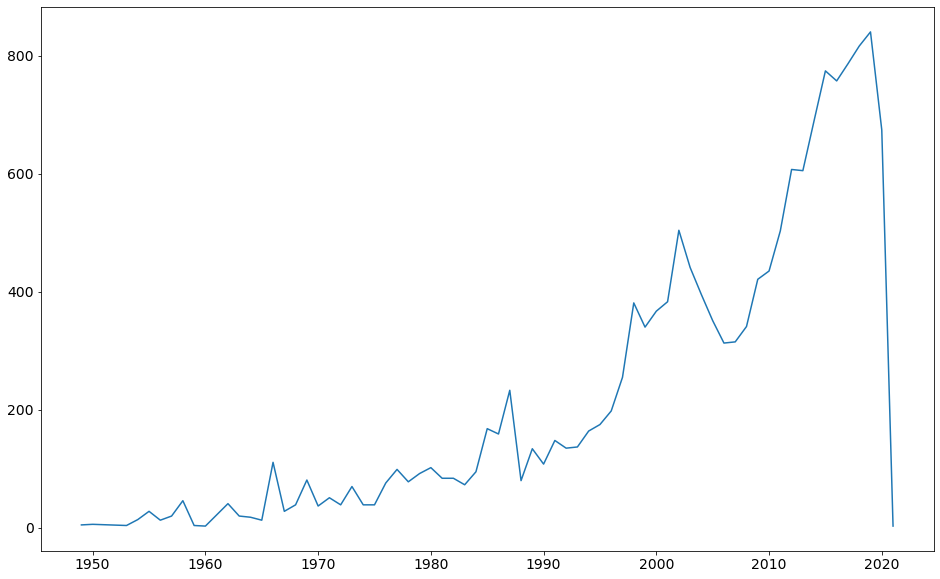

In [57]:
# 년도별 출시 세트수 꺾은선 그래프로 나타내기
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(sets_by_year.index, sets_by_year)    # 만약 groupby를 사용했다면, plt.plot(sets_by_year.index, sets_by_year.set_num)

- 만약 해당 2년을 제외 하지 않으면 위와 같이 차트 끝에 극적인 하락이 보여진다. 레고에 큰 문제라도 난 것 처럼 오해의 소지가 있다.
- 또한 2021년 데이터 셋에 모든 달이 들어가지 않았다는 점을 고려할 때, 더 나은 그림을 출력하려면 2020년, 2021년의 컬럼을 제외시키는 것이 최선이겠다.

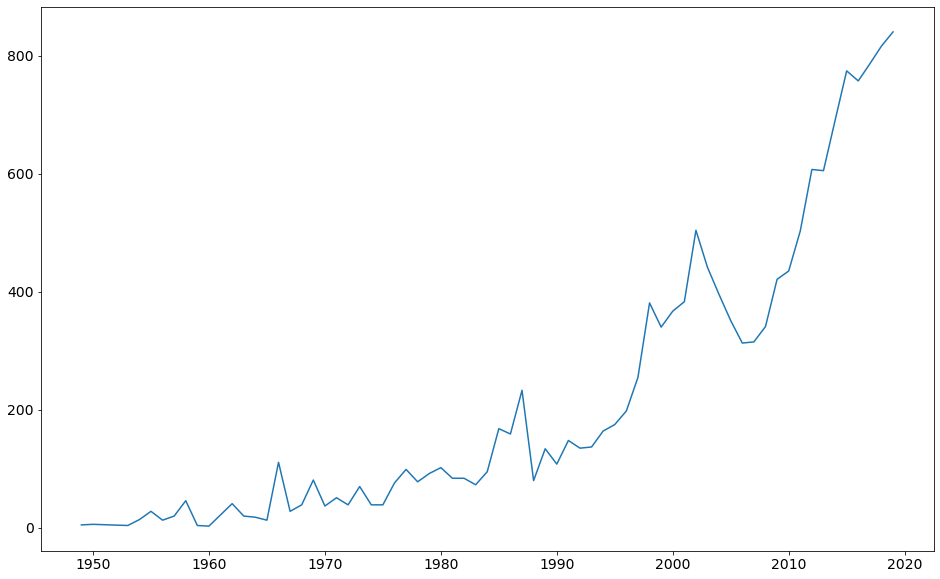

In [58]:
# 2020년 후반 데이터 삭제 후 다시 그래프 그리기
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(sets_by_year.index[:-2], sets_by_year[:-2])     #  # 만약 groupby를 사용했다면, plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

- 레고는 처음 45여 년간 제공하는 제품을 꾸준히 증가시켰지만, 실제로 회사에서 생상한 세트 수가 급격히 증가한 것은 1990년대 중반 이었다. 
- 또한 차트에서 2000년대 초반에 잠시 하락했고, 2005년경 강한 회복을 보여주다. 2008년도 글로벌 금융 위기로 다시 하락한다. 
- 그러다 2010년 경에 폭발적인 회복세를 보여주는 양상을 보인다.

### 6. 판다스 .agg() 함수 사용법 
- 데이터를 요약해야 하는 경우가 종종 있다. 이 경우 ".groupby()" 함수가 굉장이 유용하다. 하지만 특정 데이터프레임 컬럼에 기반하여 더 많은 작업을 실행하고자 할 때가 있다.
- 이 때 바로 사용하는 것이 ".agg()" 메소드 이다. ".agg()"는 사용자에게 다중집계작업을 간결하게 나타낼 수 있도록 한다.

#### 6-1. 연도별 테마 수 
- 지금 모든 달이 들어간 연도를 가지고 연도별 테마의 수를 계산하고자 한다. 따라서 연도별로 데이터를 그룹화한 다음, 해당 연도 고유 theme_ids의 수를 계산해야 한다. 
- ".groupby()"와 ".agg()" 함수를 연결하여 해당 문제를 해결할 수 있다. 

In [62]:
# 연도별 테마 수 추출 
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


- 기억할 것은 ".agg()" 메소드가 인자에서 딕셔너리 역할을 수행한다는 점이다. 이 딕셔너리에서 각 열에 어떤 작업을 적용할지 구체화하게 된다.
- 이떄 ".nunique()" 메소드를 사용하여 theme_id 컬럼에 있는 고유 항목 수를 계산해주기만 하면 된다.

In [63]:
# themes_by_year 컬럼명 변경 
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


- themes_by_year에 있는 컬럼에 더 적절한 이름으로 변경 했다. nr_themes으로 컬럼명을 변경 후 변경 사항이 DataFrame에 바로 적용된디.

In [64]:
# 맨 아래 데이터 출력 
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


- 여기서 레고가 처음 몇 년 동안 2개의 테마만 가지고 있었지만 세트수와 마찬가지로 테마의 수도 수년에 걸쳐 다양하게 확장했음을 알 수 있다.

#### 6-2. 연도별로 출시된 테마 수 추세 그래프로 나타내기

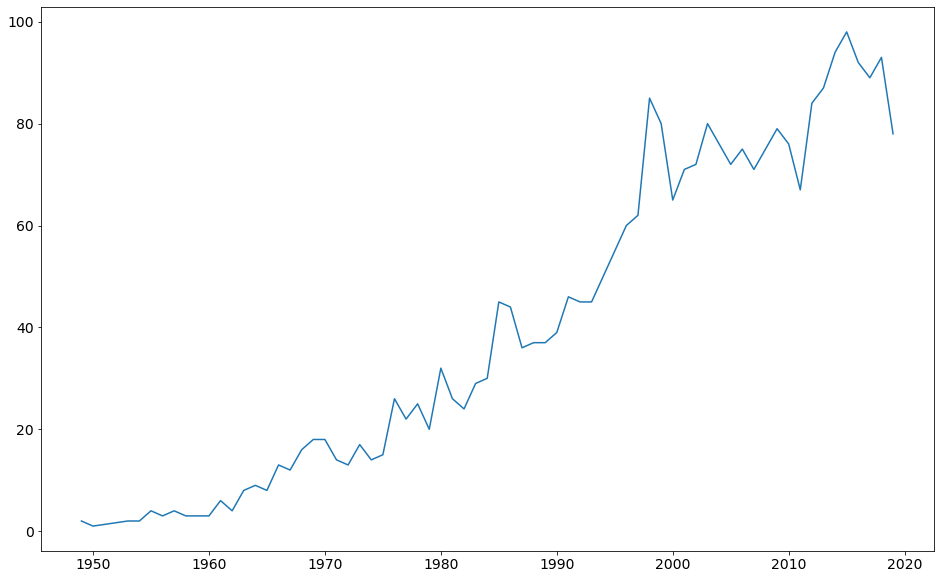

In [75]:
# 연도별로 출시된 테마수 추세 그래프 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

- 차트에서 레고가 1990년대 중반까지 꽤 일관되게 점점 더 많은 테마를 추가했음을 알 수 있다.
- 그리고 2010년대 초반까지 약 10년 동안 테마의 수는 정체되었다.

### 7. 축이 다른 선형 차트를 중첩하기 

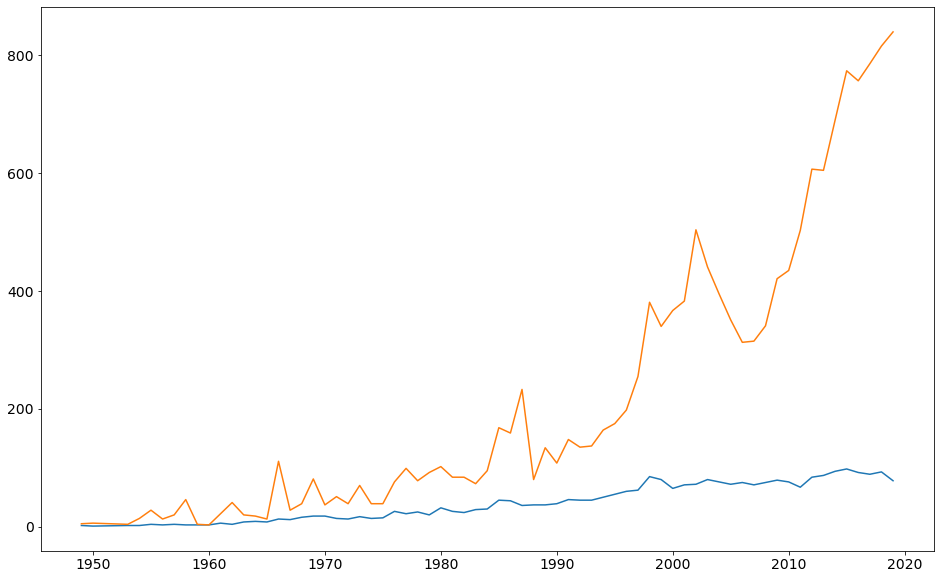

In [77]:
# 같은 차트에 축이 다른 차트 그리기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year[:-2])

- 일반적으로 그냥 다른 축의 두 그래프를 그리게 된다면 위와 같이 나온다. 
- 여기서 문제는 "테마의 수"와 "세트의 수"의 단위가 다르난 것이다. "테마의 수"는 0에서 90 사이의 범위 "세트의 수"는 0에서 900 사이의 범위에 있다.

#### 7-1. 두 개의 별도 축
- 그럼 어떻게 해야 의미있는 그래프가 완성될까? 동일한 차트에서 두 개의 개별 축을 세워 데이터를 구성하고 표시할 수 있도락 해야 한다.
- 이를 위해 맷플롯립에서 축 개체를 가져와야 한다.

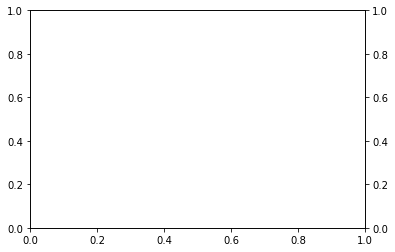

In [78]:
# 축 개체 가져오기 
ax1 = plt.gca()      # 현재 축을 얻고 
ax2 = ax1.twinx()    # 동일한 x축을 공유하는 다른 축 생성

- 그런 다음 또다른 축 개체 "ax2"를 생성해준다. 핵심이 되는 것은 ".twinx()" 메소드를 이용해서 "ax1"과 "ax2"가 동일한 x축을 사용하도록 하는 것이다.

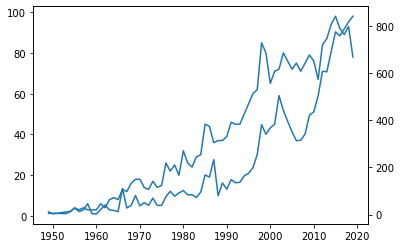

In [79]:
# 축 개체에 또 다른 개체를 생성 후 그래프 그리기 
ax1 = plt.gca()      # 현재 축을 얻고 
ax2 = ax1.twinx()    # 동일한 x축을 공유하는 다른 축 생성

# 그래프 그리기 
ax1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
ax2.plot(sets_by_year.index[:-2], sets_by_year[:-2])

- 그래프가 정상적으로 출력되었다. 여기서 색상이 같아 구분이 안되므로, 스탈일(선의 색, 축의 색, 레이블) 추가해서 구분 짓는다. 

Text(0, 0.5, 'Number of Sets')

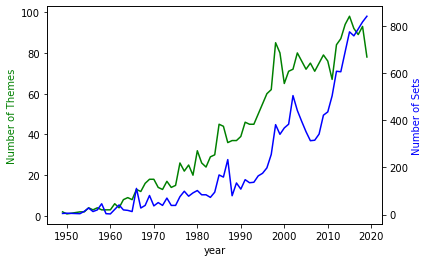

In [87]:
# 축 개체에 또 다른 개체를 생성 후 그래프 그리기 - 스타일 추가 
ax1 = plt.gca()      # 현재 축을 얻고 
ax2 = ax1.twinx()    # 동일한 x축을 공유하는 다른 축 생성

# 스타일 추가 
ax1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='g')    # 테마의 수 - green
ax2.plot(sets_by_year.index[:-2], sets_by_year[:-2], color='b')                  # 세트의 수 - blue 

# 레이블 추가 
ax1.set_xlabel('year')                           # x축 레이블 추가 
ax1.set_ylabel('Number of Themes', color='green')  # y축 첫 번째 레이블 추가 - 색상 설정: green
ax2.set_ylabel('Number of Sets', color='blue')   #y축 두 번째 레이블 추가 - 색상 설정: blue

### 8. 산점도: 레고 세트당 평균 부품 개수 

#### 8-1. 시간 흐름에 따른 복잡도 
- 시간이 흐르면서 레고 세트가 더 커지고 복잡해지고 있다. 레고 세트당 평균 부품 개수를 계산해 보자 (".agg()" 함수 사용)

In [85]:
# 연도별 세트당 부품수 
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})           # 레고 세트당 평균 부품 개
parts_per_set.rename(columns={'num_parts':'average_num_parts'}, inplace=True)     # 컬럼명 변경
parts_per_set

,average_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


- 위의 문제를 해결하려면 ".groupby()"와 ".agg()" 함수를 함께 사용해야한다. 여기서 ".agg()" 함수에 딕셔너리를 적용하여 "mean()" 함수를 써서 num_parts 열을 작업하면 된다. 

#### 8-2. 산점도 생성 

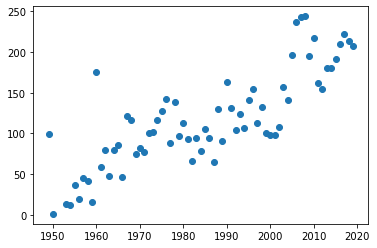

In [86]:
# 산점도 그래프
x = parts_per_set.index[:-2]
y = parts_per_set.average_num_parts[:-2]

plt.scatter(x, y) 
# plt.scatter(parts_per_set.index[:-2], parts_per_set.average_num_parts[:-2]) 

- 차트를 보면 평균 부품수를 기준으로 레고 세트의 크기와 복잡도가 증가하는 흐름을 확실히 파악할 수 있다.
- 2010년대에는 평균 세트에 약 200개 이상의 개별 부품이 들어있었는데, 이는 1960년대 레고 세트에 들어 있던 개별 부품수의 약 두 배 정도이다.

### 9. 연관 데이터베이스 스키마: 기본키와 외래키 
- 레고는 해리포터, 마블 수퍼 히어로 등 수많은 히트작을 이용한 제품의 판매권을 가지고 있다. 그런데 어느 테마가 가장 많은 개별 세트를 보유하고 있을까? 

#### 9-1. 레고 테마당 세트의 수 

In [90]:
# 레고 테마당 세트 개수 
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

- 테마당 세트수를 계싼하기 위해 "theme_id"열에 ".value_counts()" 메소드를 사용하였다. 그런데 문제가 하나있는데, 바로 테마의 실제 이름을 알 수 없어서, 데이터 구분이 잘 가지 않는다.
- 이럴 경우 theme_id별 테마 이름을 알아볼 필요가 있다.

#### 9-2. 연관 데이터베이스를 이용한 작업 
- 그전에 데이터베이스 스키마에 대해서 알아보자. 데이터베이스의 스키마란 데이터베이스가 운영되는 방식이다.
- 여기서는 레고 데이터와 같은 많은 관련 데이터베이스는 개별 테이블로 쪼개져있다. 여기에는 색상, 세트, 테마에 대한 각각의 테이블이 있다. 관계형 데이터베이스를 이용하면, 테이블이 키를 통해 서료 연결된다. (프라이머리 키, 외래키)


<img src="assets/rebrickable_schema.png">

#### 9-3. themes.csv 파일의 이해 
- themes.csv 파일에는 실제 테마 이름이 나와 있다. 테이블은 다른 테이블과 어떻게 연결되어 있을까? 
- sets.csv에는 theme_ids가 있고, 이는 themes.csv에서 id 컬럼과 연결된다. 따라서 theme_id는 sets.csv 안에서 외래키를 의미한다. 서로 다른 세트가 같은 테마의 일부를 이룰 수 있다.
- 그러나 themes.csv 안에 각각의 theme_id가 id로 불리고 있는데 이것은 고유한 값이다. 이 고유성으로 인해 id 열이 themes.csv안에서 기본키가 된다.

In [92]:
# themes.csv 파일 열기 
themes = pd.read_csv('data/themes.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


- themes.csv를 불러오고 데이터를 살펴보면, "id"열의 각각의 값은 고유값으로 파악된다(이는 themes 테이블에서 기본키(프라이머리 키)이다). 테마의 이름은 고유하지 않다.

In [96]:
# 테마 안에 "Star Wars"는 몇 건 있는지 필터링
# themes[themes.name == 'Star Wars']
star_wars_themes = themes[themes['name'].str.contains('Star Wars', case=False)]
star_wars_themes

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


- 스타워즈를 검색해보면 검색돈은 4개의 다른 id가 이 이름에 해당되고 있다는 것을 알 수 있다.

In [97]:
# "Star Wars" 아이디 리스트로 출력
star_wars_theme_ids = star_wars_themes['id'].tolist()
star_wars_theme_ids

[18, 158, 209, 261]

In [99]:
# themes에서 찾은 Star Wars Id 값을 sets와 연결 - 전체 
matching_sets = sets[sets['theme_id'].isin(star_wars_theme_ids)]
matching_sets

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


- 스타워즈는 왜 이렇게 다양한 테마를 보유하고 있는 것 일까? 검색된 위 id 값을 하나 하나 살펴보면 그 답은 의외로 간단하다.

In [100]:
# 스타워즈 18번 테마
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


- 18번 테마는 데이터 기준 2000년 부터 2002년 까지 운영되었고, 이 시리즈의 몇몇 캐릭터로 구성된 것으로 보여진다. 그리고 브릭수도 많은 제품들로 구성되어 있다.

In [101]:
# 스타워즈 158번 테마
sets[sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


- 158번 테마는 운영된 년도도 다양하고, 시리즈, 브릭수 등 다양한 제품군들로 구성되어 있다. (그런데 브릭수가 0으로 되어 있는 데이터들이 간혹 있다.)

In [102]:
# 스타워즈 209번 테마
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


- 209번 테마는 Star Wars Advent Calendar 전부가 동일한 theme_id를 가지고 있다. 아마 년도 별로 새해를 맞아 준비한 제품군으로 파악된다.

In [106]:
# 스타워즈 158번 테마
sets[sets.theme_id == 261]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


- 261번 테마는 단 두 가지 제품 군으로 탐색되는데, 레고 Developers 기트들로 구성되어 있다.

### 10. 데이터프레임을 병합하여 막대 차트를 만드는 방법 
- 여기서 테마당 세트 수와 테마명 데이터를 결합하면 더 좋지 않을까? 
- ".merge()" 메소드를 이용하 별개의 두 데이터프레임을 하나로 결합 할 수 있다. 
- ".merge()" 메소드는 양쪽의 데이터프레임에서 같은 이름을 가진 열에 적용된다.

In [107]:
# 레고 테마당 세트 개수 
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

- 지금은 "theme_id"와 테마별 세트 수가 "set_theme_count"라고 불리는 시리즈 안에 있다.

In [108]:
# 레고 테마당 세트 개수 시리즈를 데이터프레임으로 변환 
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                               'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


- 이제 id 라는 이름의 열이 있다는 것을 확인하기 위해 판다스 시리즈를 데이터프레임으로 변환해보았다.(데이터프레임을 생성하기 위해 딕셔너리를 사용했는데, 여기서 키 값이 열 이름이다.)

#### 10-1.  Pandas.merge() 기능

In [109]:
# 두 데이터프레임(set_theme_count, themes) merge 하기 
merge_df = pd.merge(set_theme_count, themes, on='id')
merge_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


- 두 개의 데이터프레임을 하나의 특정 열에 ".merge()"하기 위해서는 해당 두 데이터프레임 및 병합한 열 이름을 알려줘야 한다. 그래서 "on='id'"를 설정한 것이다. 
- set_theme_count와 themes 데이터프레임 둘 다 "id"라는 열 이름이 있다. 
- 병합한 데이터프레임을 확인해보니 스타워즈는 진정 가장 많은 레고 세트를 낸 테마라는걸 세삼 느낀다.

#### 10-2. 막대 차트 만들기 

<BarContainer object of 10 artists>

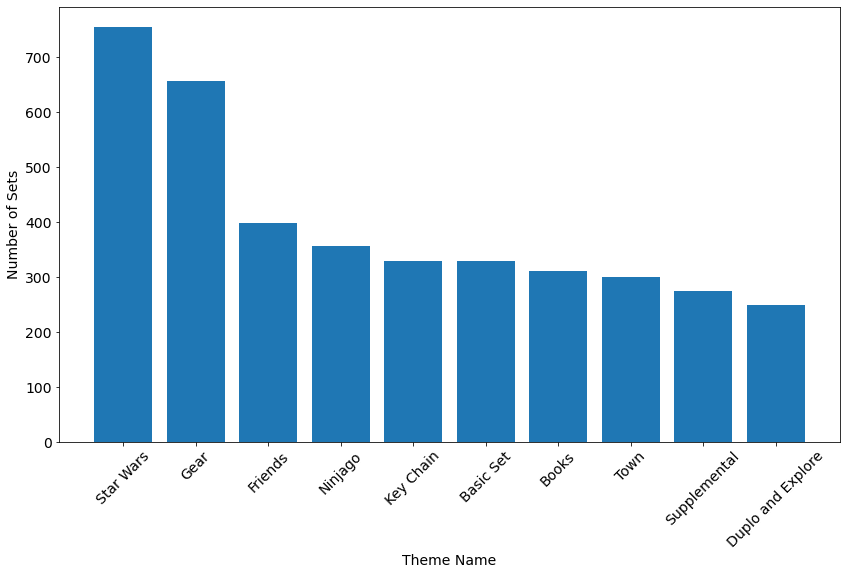

In [112]:
# 병합한 데이터프레임을 바탕으로 상위 10개 테마를 표시하는 막대 차트 그리기 
plt.figure(figsize=(14, 8))                       # 차트 사이즈 설정 
plt.xticks(fontsize=14, rotation=45)              # x축 폰트 사이즈 및 폰트 회전 각도 조절 
plt.yticks(fontsize=14)                           # y축 폰트 사이즈 조절
plt.ylabel("Number of Sets", fontsize=14)         # y축 label 설정  
plt.xlabel("Theme Name", fontsize=14)             # x축 label 설정 

plt.bar(merge_df.name[:10], merge_df.set_count[:10])   # 막대 차트 설정 (x축, y축 데이터 설정)

- 막대 차트의 경우 ".bar()"를 사용해서 테마 이름과 세트 수를 넣으면 차트가 완성된다. 
- 만약 차트를 작게 만들 경우 x축의 label이 겹쳐서 나올 수 있으므로 크기 조절을 해서 잘 그려주면 된다.

- 막대 차트를 보면서 알수 있는 점은 레고 블록 뿐만 아니라 다양한 제품 라인업이 있다는 점이다.
- 스타워즈 테마 다음로 높은 테마가 바로 'Gear' 범주 이다. 'Gear' 라인에는 가방, 필통 등이 들어가있다. 
- 레고가 핵심사업에서 이탈한 것인지, 성공적인 사업 다각화를 하고 있는지 해당 데이터 셋에서는 알 수가 없다. 이는 다른 더 많은 자료들을 살펴보고 분석해야 알 수 있는 부분이다.

### Study 핵심 요약 
- 금일 Study 사항 정리 
    - 노트북에서 HTML 마크다운을 사용하여, 섹션 제목 `#` 및 `<img>` 태그로 이미지를 임베딩
    - `groupby()` 및 `count()` 함수를 결합하여 데이터 집계
    - `.value_counts()` 함수 사용
    - `[]` 표기를 사용하여 데이터프레임 슬라이스 하기 (예 `df[:-2]` or `df[:10]`)
    - `.agg()` 함수를 사용하여 특정 열에 대한 작업 실행
    - `rename()` 데이터프레임 열 이름 바꾸기 
    - 단위가 다른 데이터를 시각화하기 위해 두 개의 개별 축이 있는 선형 차트를 만들기
    - 맷플롯립에서 산점도 만들기
    - 기본키와 외래키를 사용하여 연관 데이터베이스에서 표 작업하기
    - 특정 열을 따라 데이터프레임 `.merge()`하기
    - 맷플롯립으로 막대 차트 만들기